In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
# dataset
X = np.random.randn(100,1)
y = 7*X + np.random.rand()

X.shape
y.shape

(100, 1)

(100, 1)

{k:v for k,v in zip(X,y)}

In [5]:
def gradient_descent(x, y, w:float, b:float, alpha:float=0.01):
    '''
    optimize parameters w, b using gradient descent
    '''
    
    dldw = 0
    dldb = 0
    N = x.shape[0]
    
    # loss = (y - yhat)**2
    # or, loss = (y - (w*x + b))**2
    for xi, yi in zip(x,y):
        dldw += -2 * xi * (yi - (w*xi + b))
        dldb += -2 * (yi - (w*xi + b))
        
    w = w - (alpha * (1/N) * dldw)
    b = b - (alpha * (1/N) * dldb)
    
    return w, b

In [6]:
w = 0.0  # np.random.randn()
b = 0.0  # np.random.randn()
alpha = 0.01

losses = []
w_list = []
b_list = []
for epoch in range(400):
    w, b = gradient_descent(X, y, w, b, alpha)
    yhat = w*X + b
    loss = np.divide(np.sum((y - yhat)**2, axis=0), X.shape[0])
    losses.extend(loss)
    w_list.extend(w)
    b_list.extend(b)
    if epoch%40==0:  # print every 40th epoch
        print(f"{epoch} epoch: loss is {loss} | w={w} | b={b}")

# loss
# w
# b

0 epoch: loss is [47.33807577] | w=[0.14121008] | b=[-0.00333526]
40 epoch: loss is [9.41116485] | w=[3.94981323] | b=[0.07100284]
80 epoch: loss is [1.9402761] | w=[5.63082711] | b=[0.26773026]
120 epoch: loss is [0.4133244] | w=[6.37981532] | b=[0.42795108]
160 epoch: loss is [0.09051138] | w=[6.71664676] | b=[0.53182943]
200 epoch: loss is [0.02026209] | w=[6.86949073] | b=[0.592794]
240 epoch: loss is [0.00461291] | w=[6.93944014] | b=[0.62664898]
280 epoch: loss is [0.00106331] | w=[6.97170818] | b=[0.64480878]
320 epoch: loss is [0.00024731] | w=[6.98670271] | b=[0.65432426]
360 epoch: loss is [5.78828737e-05] | w=[6.99371667] | b=[0.65922813]


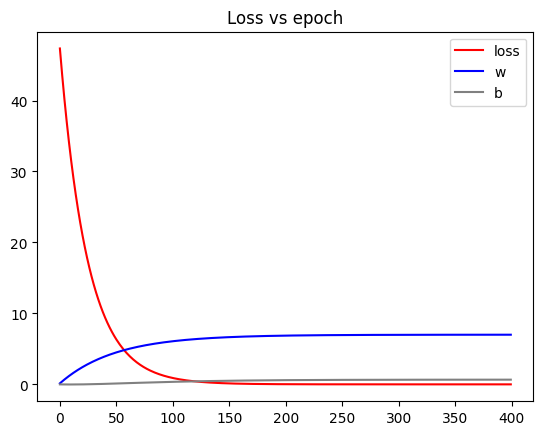

In [7]:
plt.plot(losses, color='red', label='loss')
plt.plot(w_list, color='blue', label='w')
plt.plot(b_list, color='grey', label='b')
plt.title('Loss vs epoch')
plt.legend()
plt.show();

# Validation

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

In [9]:
model = LinearRegression()

model.fit(X, y)

LinearRegression()

In [10]:
yhat = model.predict(X)

yhat.shape

(100, 1)

In [11]:
mean_absolute_percentage_error(y, yhat)

3.2967116481144334e-16

In [12]:
X.shape

(100, 1)

In [13]:
X[0:3]

array([[-0.71679589],
       [ 0.20736288],
       [ 0.52709011]])

In [14]:
input_data = np.array([[100]])
model.predict(input_data)

array([[700.66423704]])